In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
ins_data= pd.read_csv('insurance.csv')
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# checking for missing values

ins_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
# Data Analysis

ins_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


C:\Users\anxua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


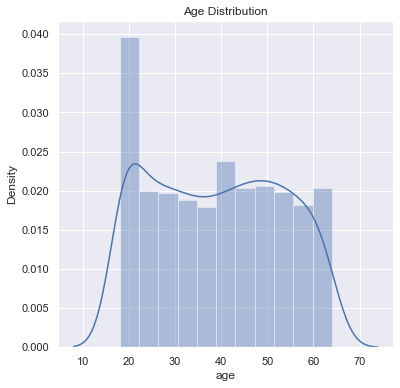

In [10]:
import seaborn as sns
%matplotlib inline
# find the distribution of age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(ins_data['age'])
plt.title("Age Distribution")
plt.show()

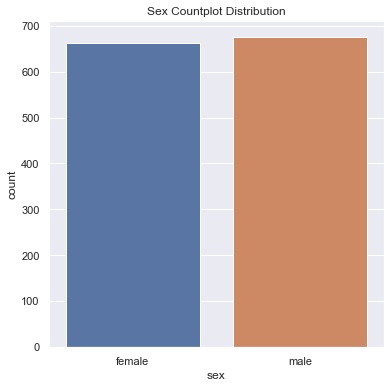

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=ins_data)
plt.title("Sex Countplot Distribution")
plt.show()

In [13]:
ins_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\anxua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


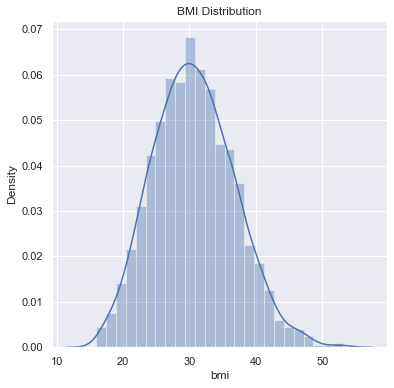

In [14]:
plt.figure(figsize=(6,6))
sns.distplot(ins_data['bmi'])
plt.title("BMI Distribution")
plt.show()

## BMI
body mass 
narmal BMI range -> 18.5 to 24.9

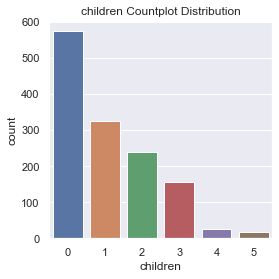

In [15]:
plt.figure(figsize=(4,4))
sns.countplot(x='children', data=ins_data)
plt.title("children Countplot Distribution")
plt.show()

In [16]:
ins_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

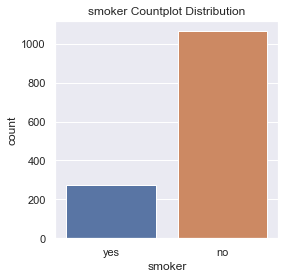

In [17]:
plt.figure(figsize=(4,4))
sns.countplot(x='smoker', data=ins_data)
plt.title("smoker Countplot Distribution")
plt.show()

In [18]:
ins_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

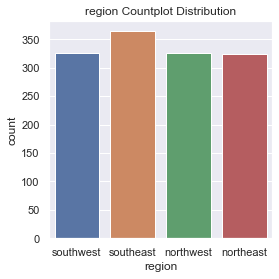

In [20]:
plt.figure(figsize=(4,4))
sns.countplot(x='region', data=ins_data)
plt.title("region Countplot Distribution")
plt.show()


In [19]:
ins_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\anxua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


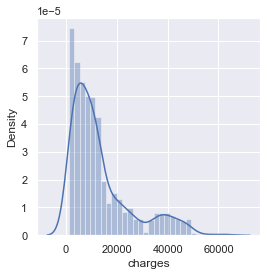

In [22]:
plt.figure(figsize=(4,4))
sns.distplot(ins_data['charges'])
plt.show()

## data preprocessing


In [24]:
#encoding categorical data

ins_data.replace({'sex':{'male' :1, 'female': 0}}, inplace=True)
ins_data.replace({'smoker':{'yes':1,'no': 0}}, inplace=True)
ins_data.replace({'region':{'southeast':0, 'southwest':1,'northeast':2,'northwest':3}}, inplace=True)


In [25]:
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [27]:
x = ins_data.drop(columns='charges', axis=1)
y = ins_data['charges']
x.shape,y.shape

((1338, 6), (1338,))

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [30]:
x_train.shape,x_test.shape

((1070, 6), (268, 6))

In [31]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.7413131194887537

In [36]:
pred = model.predict(x_train)
y_train.shape

(1070,)

In [37]:
from sklearn.metrics import r2_score
r2 =  r2_score(y_train, pred)
print(r2)

0.7413131194887537


In [38]:
ppred = model.predict(x_test)
r2 =  r2_score(y_test, ppred)
print(r2)

0.783021587162344
